# SCRIPTS 

### OPEN DOCKER

In [46]:
"""
newgrp docker
export REPO_DIR=$PWD
DATASETS=$REPO_DIR'/datasets/'
MODELS=$REPO_DIR'/models/'
OUTPUT_DIR=$REPO_DIR'/output/'
CUDA_VISIBLE_DEVICES='all'
RAW='/mnt/video-galvatron-data/users/eloisez/youtube_dl/Video_dl/'
PICKLES='/mnt/video-galvatron-data/users/eloisez/youtube_dl/'
source launch_container.sh $DATASETS $MODELS $OUTPUT_DIR $RAW $PICKLES $CUDA_VISIBLE_DEVICES
"""


"\nnewgrp docker\nexport REPO_DIR=$PWD\nDATASETS=$REPO_DIR'/datasets/'\nMODELS=$REPO_DIR'/models/'\nOUTPUT_DIR=$REPO_DIR'/output/'\nCUDA_VISIBLE_DEVICES='all'\nRAW='/mnt/video-galvatron-data/users/eloisez/youtube_dl/Video_dl/'\nPICKLES='/mnt/video-galvatron-data/users/eloisez/youtube_dl/'\nsource launch_container.sh $DATASETS $MODELS $OUTPUT_DIR $RAW $PICKLES $CUDA_VISIBLE_DEVICES\n"

### START EVALUATION ON BEST SAVED MODEL

In [47]:
"""
EVAL_DIR='./output_4e5_02_5_AUDIO_mask/checkpoint-4-175056/'
CUDA_VISIBLE_DEVICES=0 python src/tasks/run_caption_VidSwinBert.py \
       --val_yaml VATEX/public_test_128frames.yaml  \
       --do_eval true \
       --do_train false \
       --eval_model_dir $EVAL_DIR
"""

"\nEVAL_DIR='./models/table1/vatex/best-checkpoint/'\nCUDA_VISIBLE_DEVICES=0,1,2 python src/tasks/run_caption_VidSwinBert.py        --val_yaml VATEX/public_test_128frames.yaml         --do_eval true        --do_train false        --eval_model_dir $EVAL_DIR\n"

### START TRAINING ON 32 FRAMES/CONTINUE TRAINING !!

In [48]:
"""
CUDA_VISIBLE_DEVICES=0 python src/tasks/run_caption_VidSwinBert.py \
        --config src/configs/VidSwinBert/vatex_8frm_default.json \
        --train_yaml VATEX/train_32frames.yaml \
        --val_yaml VATEX/public_test_32frames.yaml \
        --per_gpu_train_batch_size 6 \
        --per_gpu_eval_batch_size 6 \
        --num_train_epochs 2 \
        --learning_rate 0.00001 \
        --pretrained_checkpoint output_3e5_05_2_SUITE/checkpoint-2-73246/ \
        --warmup_ratio 0.5\
        --max_num_frames 32 \
        --pretrained_2d 0 \
        --backbone_coef_lr 0.05 \
        --mask_prob 0.5 \
        --max_masked_token 45 \
        --zero_opt_stage 1 \
        --mixed_precision_method deepspeed \
        --deepspeed_fp16 \
        --gradient_accumulation_steps 1 \
        --learn_mask_enabled \
        --transfer_method 0 \
        --reload_pretrained_swin 1 \
        --loss_sparse_w 0.5 \
        --output_dir ./output_3e5_05_2_SUITE_1e5_05_2
"""

'\nCUDA_VISIBLE_DEVICES=0 python src/tasks/run_caption_VidSwinBert.py         --config src/configs/VidSwinBert/vatex_8frm_default.json         --train_yaml VATEX/train_32frames.yaml         --val_yaml VATEX/public_test_32frames.yaml         --per_gpu_train_batch_size 6         --per_gpu_eval_batch_size 6         --num_train_epochs 2         --learning_rate 0.00001         --pretrained_checkpoint output_3e5_05_2_SUITE/checkpoint-2-73246/         --warmup_ratio 0.5        --max_num_frames 32         --pretrained_2d 0         --backbone_coef_lr 0.05         --mask_prob 0.5         --max_masked_token 45         --zero_opt_stage 1         --mixed_precision_method deepspeed         --deepspeed_fp16         --gradient_accumulation_steps 1         --learn_mask_enabled         --transfer_method 0         --reload_pretrained_swin 1         --loss_sparse_w 0.5         --output_dir ./output_3e5_05_2_SUITE_1e5_05_2\n'

In [49]:
"""
CUDA_VISIBLE_DEVICES=0 python src/tasks/run_caption_VidSwinBert.py \
        --config src/configs/VidSwinBert/vatex_8frm_default.json \
        --train_yaml VATEX/train_32frames.yaml \
        --val_yaml VATEX/public_test_32frames.yaml \
        --per_gpu_train_batch_size 6 \
        --per_gpu_eval_batch_size 6 \
        --num_train_epochs 2 \
        --learning_rate 0.0001 \
        --warmup_ratio 0.1 \
        --max_num_frames 32 \
        --pretrained_2d 0 \
        --backbone_coef_lr 0.05 \
        --mask_prob 0.5 \
        --max_masked_token 45 \
        --zero_opt_stage 1 \
        --mixed_precision_method deepspeed \
        --deepspeed_fp16 \
        --gradient_accumulation_steps 1 \
        --learn_mask_enabled \
        --loss_sparse_w 0.5 \
        --output_dir ./output_AUDIOONLY_RANDOM_TEST
"""

'\nCUDA_VISIBLE_DEVICES=0 python src/tasks/run_caption_VidSwinBert.py         --config src/configs/VidSwinBert/vatex_8frm_default.json         --train_yaml VATEX/train_32frames.yaml         --val_yaml VATEX/public_test_32frames.yaml         --per_gpu_train_batch_size 6         --per_gpu_eval_batch_size 6         --num_train_epochs 5         --learning_rate 0.00004         --warmup_ratio 0.2         --max_num_frames 32         --pretrained_2d 0         --backbone_coef_lr 0.05         --mask_prob 0.5         --max_masked_token 45         --zero_opt_stage 1         --mixed_precision_method deepspeed         --deepspeed_fp16         --gradient_accumulation_steps 1         --learn_mask_enabled         --loss_sparse_w 0.5         --output_dir ./output_4e5_02_5_AUDIO_norm\n'

In [50]:
### MULTI GPU COMMAND
"""
CUDA_VISIBLE_DEVICES=0,1,2,3 python -m torch.distributed.launch --nproc_per_node=4 --master_port=29501  \
        src/tasks/run_caption_VidSwinBert.py \
        --config src/configs/VidSwinBert/vatex_8frm_default.json \
        --train_yaml VATEX/train_32frames.yaml \
        --val_yaml VATEX/public_test_32frames.yaml \
        --per_gpu_train_batch_size 6 \
        --per_gpu_eval_batch_size 6 \
        --num_train_epochs 10 \
        --learning_rate 0.0002 \
        --warmup_ratio 0.066 \
        --max_num_frames 32 \
        --pretrained_2d 0 \
        --backbone_coef_lr 0.05 \
        --mask_prob 0.5 \
        --max_masked_token 45 \
        --zero_opt_stage 1 \
        --mixed_precision_method deepspeed \
        --deepspeed_fp16 \
        --gradient_accumulation_steps 1 \
        --learn_mask_enabled \
        --loss_sparse_w 0.5 \
        --seed 23 \
        --output_dir ./to_delete

"""
seed 0 = see dans log
seed 1 = 42
seed 2 = 23

'\nCUDA_VISIBLE_DEVICES=0,1,2,3 python -m torch.distributed.launch --nproc_per_node=4 --master_port=29501          src/tasks/run_caption_VidSwinBert.py         --config src/configs/VidSwinBert/vatex_8frm_default.json         --train_yaml VATEX/train_32frames.yaml         --val_yaml VATEX/public_test_32frames.yaml         --per_gpu_train_batch_size 6         --per_gpu_eval_batch_size 6         --num_train_epochs 10         --learning_rate 0.0002         --warmup_ratio 0.066         --max_num_frames 32         --pretrained_2d 0         --backbone_coef_lr 0.05         --mask_prob 0.5         --max_masked_token 45         --zero_opt_stage 1         --mixed_precision_method deepspeed         --deepspeed_fp16         --gradient_accumulation_steps 1         --learn_mask_enabled         --loss_sparse_w 0.5         --output_dir ./output_gpus_2e4_0.066_10\n\n'

In [51]:
### MULTI GPU COMMAND CONTINUE TRAINING
"""
CUDA_VISIBLE_DEVICES=0,1,2,3 python -m torch.distributed.launch --nproc_per_node=4 --master_port=29501  \
        src/tasks/run_caption_VidSwinBert.py \
        --config src/configs/VidSwinBert/vatex_8frm_default.json \
        --train_yaml VATEX/train_32frames.yaml \
        --val_yaml VATEX/public_test_32frames.yaml \
        --per_gpu_train_batch_size 6 \
        --per_gpu_eval_batch_size 6 \
        --num_train_epochs 3 \
        --learning_rate 0.00001 \
        --pretrained_checkpoint output_gpus_2e4_0.1_5/best_checkpoint_53099/ \
        --warmup_ratio 0.3 \
        --max_num_frames 32 \
        --pretrained_2d 0 \
        --backbone_coef_lr 0.05 \
        --mask_prob 0.5 \
        --max_masked_token 45 \
        --zero_opt_stage 1 \
        --mixed_precision_method deepspeed \
        --deepspeed_fp16 \
        --gradient_accumulation_steps 1 \
        --learn_mask_enabled \
        --transfer_method 0 \
        --reload_pretrained_swin 1 \
        --loss_sparse_w 0.5 \
        --output_dir ./output_gpus_1e5_0.3_SUITE_3

"""

'\nCUDA_VISIBLE_DEVICES=0,1,2,3 python -m torch.distributed.launch --nproc_per_node=4 --master_port=29501          src/tasks/run_caption_VidSwinBert.py         --config src/configs/VidSwinBert/vatex_8frm_default.json         --train_yaml VATEX/train_32frames.yaml         --val_yaml VATEX/public_test_32frames.yaml         --per_gpu_train_batch_size 6         --per_gpu_eval_batch_size 6         --num_train_epochs 3         --learning_rate 0.00001         --pretrained_checkpoint output_gpus_2e4_0.1_5/best_checkpoint_53099/         --warmup_ratio 0.3         --max_num_frames 32         --pretrained_2d 0         --backbone_coef_lr 0.05         --mask_prob 0.5         --max_masked_token 45         --zero_opt_stage 1         --mixed_precision_method deepspeed         --deepspeed_fp16         --gradient_accumulation_steps 1         --learn_mask_enabled         --transfer_method 0         --reload_pretrained_swin 1         --loss_sparse_w 0.5         --output_dir ./output_gpus_1e5_0.3_SUITE_3\n

# RESULT ANALYSIS

### Compare with expected best results

In [24]:
import json 
with open("/mnt/video-galvatron-data/users/eloisez/VideoCaptioning/SwinBERT/output_4e5_02_5/second_best_checkpoint_179438/pred.VATEX.public_test_32frames.beam1.max20_coco_format.json", "r") as f:
    preds_frame = json.load(f)
with open("/mnt/video-galvatron-data/users/eloisez/VideoCaptioning/SwinBERT/output_4e5_02_5_AUDIO_mask/checkpoint-4-175056/pred.VATEX.public_test_32frames.beam1.max20_coco_format.json", "r") as f:
    preds_waudio = json.load(f)
with open("/mnt/video-galvatron-data/users/eloisez/VideoCaptioning/SwinBERT/output_1e4_01_2_AUDIOONLY/checkpoint-2-72946/pred.VATEX.public_test_32frames.beam1.max20_coco_format.json", "r") as f:
    preds_audioonly = json.load(f)
with open("/mnt/video-galvatron-data/users/eloisez/VideoCaptioning/SwinBERT/output_AUDIOONLY_RANDOM_TEST/checkpoint-2-72946/pred.VATEX.public_test_32frames.beam1.max20_coco_format.json", "r") as f:
    preds_rando = json.load(f)

preds_frame_dict = {}
for element in preds_frame:
    preds_frame_dict[element['image_id'][-15:-4]] = element['caption']

preds_waudio_dict = {}
for element in preds_waudio:
    preds_waudio_dict[element['image_id'][-15:-4]] = element['caption']

preds_audioonly_dict = {}
for element in preds_audioonly:
    preds_audioonly_dict[element['image_id'][-15:-4]] = element['caption']

preds_rando_dict = {}
for element in preds_rando:
    preds_rando_dict[element['image_id'][-15:-4]] = element['caption']


In [25]:
def tsv_reader(tsv_file, sep='\t'):
    with open(tsv_file, 'r') as fp:
        for i, line in enumerate(fp):
            yield [x.strip() for x in line.split(sep)]

In [26]:
import ast
true_cap, true_cap_split = {}, {}
i = 0
with open(f"datasets/VATEX/public_test.caption.tsv", "r") as f:
    for row in f :
        youtube_id = row.split('\t')[0].split('/')[-1][:-4]
        captions = ast.literal_eval(row.split('\t')[1])
        caption_list_split = [d["caption"].lower().strip('.').split(' ') for d in captions]
        caption_list = [d["caption"].lower().strip('.') for d in captions]
        true_cap_split[youtube_id] = caption_list_split
        true_cap[youtube_id] = caption_list

In [10]:
for id in ["fgzGX-pPYiM", "0HEi6q3bGaw", "6dsG2BIL53o", "78M2QDjGQz4", "YEBDRLFtWlc", "_iqgDkqaU7Q", "JoP6OUiUt2E", "egwQhuJeriI", "TTGweomNJjI", "AtUtNC2dTiY", "LGYojhMKe6g"]:
    print(f"ONLY FRAMES : {preds_frame_dict[id]}")
    print(f"FRAMES+AUDIO : {preds_waudio_dict[id]}")
    print(f"ONLY AUDIO : {preds_audioonly_dict[id]}")
    print(f"TRUE PREDS : {true_cap[id]}\n")
    

ONLY FRAMES : a group of people are swimming in the water and one of them is swimming.
FRAMES+AUDIO : a group of people are swimming in the water and they are swimming in the water.
ONLY AUDIO : a woman is showing how to use a sewing machine to make a piece of fabric.
TRUE PREDS : ['divers are underwater measuring a large anchor while a child describes what they are doing', 'two people review an ancient anchor that can be seen underneath the water', 'two people underwater wearing scuba equipment making notes and measuring an old anchor', 'a man is underwater drawing a picture of a treasure', 'a man is drawing on paper underwater while a child talks', 'underwater a scuba diver writes down information about an anchor that is on the sea floor', 'several divers examine archaeological artifacts while a little kid narrates in the background', 'a man in underwater drawing a picture of an artifact', 'a few divers underwater observing and measuring a rusted large and sunken anchor', 'archaeolog

In [27]:
from nltk.translate.bleu_score import corpus_bleu
ids = [k for k in preds_frame_dict.keys()]
ids.remove("Q7UqFn8xMv0")
ids.remove("CB3nEnx81mE")
ids.remove("_2T2br3aqMs")
ids.remove("U7LC5P8VDZw")
ids.remove('c3DAquBQ2dg')
ids.remove('eS45xNUmv-A')
ids.remove('baEoQJbrqP0')
ids.remove('EDt6Xies1Yo')
corpus = [true_cap_split[k] for k in ids]
frames = [preds_frame_dict[k].lower().strip('.').split(' ') for k in ids]
waudio = [preds_waudio_dict[k].lower().strip('.').split(' ') for k in ids]
audio = [preds_audioonly_dict[k].lower().strip('.').split(' ') for k in ids]
rando = [preds_rando_dict[k].lower().strip('.').split(' ') for k in ids]
total_frames = corpus_bleu(corpus, frames)
total_waudio = corpus_bleu(corpus, waudio)
total_audio = corpus_bleu(corpus, audio)
total_rando = corpus_bleu(corpus, rando)

In [28]:
from nltk.translate.bleu_score import *
score_frames = []
score_waudio = []
score_audio = []
score_rando = []
sf = SmoothingFunction()
for k in ids :
    score_frames.append(sentence_bleu(true_cap_split[k], preds_frame_dict[k].lower().strip('.').split(' '), smoothing_function=sf.method1))
    score_waudio.append(sentence_bleu(true_cap_split[k], preds_waudio_dict[k].lower().strip('.').split(' '), smoothing_function=sf.method1))
    score_audio.append(sentence_bleu(true_cap_split[k], preds_audioonly_dict[k].lower().strip('.').split(' '), smoothing_function=sf.method1))
    score_rando.append(sentence_bleu(true_cap_split[k], preds_rando_dict[k].lower().strip('.').split(' '), smoothing_function=sf.method1))

In [29]:
import numpy as np
print(f'Frames only total bleu-4 is {total_frames}\n The mean of the sentence bleu is {np.mean(score_frames)}')
print(f'Frames+audio total bleu-4 is {total_waudio}\n The mean of the sentence bleu is {np.mean(score_waudio)}')
print(f'Audio only total bleu-4 is {total_audio}\n The mean of the sentence bleu is {np.mean(score_audio)}')
print(f'Random audio total bleu-4 is {total_rando}\n The mean of the sentence bleu is {np.mean(score_rando)}')

Frames only total bleu-4 is 0.36084926021477337
 The mean of the sentence bleu is 0.3268071923013157
Frames+audio total bleu-4 is 0.36495517344934575
 The mean of the sentence bleu is 0.3296179817264459
Audio only total bleu-4 is 0.1582422623039241
 The mean of the sentence bleu is 0.13999193604746493
Random audio total bleu-4 is 0.09838258176595674
 The mean of the sentence bleu is 0.09331898425576524


In [31]:
improved = [i for i in range(len(score_frames)) if score_frames[i] > score_waudio[i] + 0.3]
print(len(improved))
#improved_ordered = sorted(improved, key=lambda k: score_waudio[k], reverse=True)
improved_ordered = sorted(improved, key=lambda k: score_waudio[k])

for i in improved_ordered :
    k = ids[i]
    print(f"La video : https://www.youtube.com/watch?v={k}")
    print(f"Frames prediction : {preds_frame_dict[k]}, Bleu-4 = {score_frames[i]}")
    print(f"Frames+Audio prediction : {preds_waudio_dict[k]}, Bleu-4 = {score_waudio[i]}")
    print(f"Audio only prediction : {preds_audioonly_dict[k]}, Bleu-4 = {score_audio[i]}")
    #print(f"Random audio prediction : {preds_rando_dict[k]}, Bleu-4 = {score_rando[i]}")
    print(f"True preds : {true_cap[k]}")


200
La video : https://www.youtube.com/watch?v=1-jIze6gy0g
Frames prediction : a group of people are working together in a factory., Bleu-4 = 0.7311104457090247
Frames+Audio prediction : a man is using a machine to fill a piece of metal., Bleu-4 = 0.026658376817028866
Audio only prediction : a man is using a power tool to cut a piece of wood., Bleu-4 = 0.024316915840399723
True preds : ['several people are working together on a factory line filling bags', 'workers wait patiently  for bags of unknown materials to move down conveyor belt so they can seal them and be placed with the rest', 'a conveyor belt is conveying plastic bags while people are working next to it', 'in a factory, people work on the assembly line taking bags off when they come through', 'people are working in a loud factory and one yells something', 'a group of people work in a factory to create products together', 'workers handle bags of material moving on a conveyor belt', 'this person is working on an assembly line 

In [ ]:
import numpy as np
threshold_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for j in range(len(threshold_list)-1) :
    bad = [i for i in range(len(score_me)) if score_me[i] >= threshold_list[j] and score_me[i] < threshold_list[j+1]]
    print(f"{100*len(bad)/len(score_me)}% videos have a bleu-4 score between {threshold_list[j]} and {threshold_list[j+1]}")

10.821407567143698% videos have a bleu-4 score between 0 and 0.1
25.58321897667124% videos have a bleu-4 score between 0.1 and 0.2
9.507939619682416% videos have a bleu-4 score between 0.2 and 0.3
14.036463438541462% videos have a bleu-4 score between 0.3 and 0.4
13.291511468339541% videos have a bleu-4 score between 0.4 and 0.5
11.193883552244658% videos have a bleu-4 score between 0.5 and 0.6
7.665163693393453% videos have a bleu-4 score between 0.6 and 0.7
4.665751813369927% videos have a bleu-4 score between 0.7 and 0.8
1.901587923936483% videos have a bleu-4 score between 0.8 and 0.9
1.0586159576553618% videos have a bleu-4 score between 0.9 and 1


In [ ]:
bad = [i for i in range(len(score_me)) if score_me[i] < 0.1]
bad_ordered = sorted(bad, key=lambda k: score_me[k])
import pandas as pd 
time_info = pd.read_pickle("/mnt/video-galvatron-data/users/eloisez/youtube_dl/test_to_dl.pkl").set_index('videoID')
print(len(bad))

552


In [ ]:
for i in bad_ordered :
    k = list(my_preds_dict.keys())[i]
    print(f"Ma prediction : {my_preds_dict[k]}, Bleu-4 = {score_me[i]}")
    print(f"La video : https://www.youtube.com/watch?v={k}")
    print(time_info.loc[k])
    print(f"True predictions : {[' '.join(phrase) for phrase in true_cap[k]]}")


Ma prediction : a man runs and jumps into a room and then another man runs up to him., Bleu-4 = 0.019251614434393566
La video : https://www.youtube.com/watch?v=egwQhuJeriI
Start time    0:00:08
End time      0:00:18
Name: egwQhuJeriI, dtype: object
True predictions : ['two people are playing laser tags inside the house and trying to shoot each other', 'two men are inside a building and the men are playing laser tag', 'a games of laser tag that goes wrong and the other guy is cornered', 'two men are shown playing a laser tag game in a house', 'two men simulating a gun fight with lasers in a regular looking house with old camera equipment', 'the people are playing a game of laser tag inside the home', 'two men play laser tag with each other inside their house', 'two men play laser tag hiding behind counters and diving', 'two guys are in a living room playing laser tag', 'men hide behind things for cover in a game of laser tag in a house before one man dives at towards the other while sho

### Most common labels to see if problem in the generation

In [24]:
inv_map = {}
for k, v in preds_audioonly_dict.items():
    inv_map[v] = inv_map.get(v, 0) + 1

from collections import Counter
c = Counter(inv_map)
most_common = c.most_common(20)
print(most_common)

[('a man is using a tool to cut a piece of wood.', 500), ('a person is using a tool to cut a piece of wood.', 339), ('a man is demonstrating how to use a tool to cut a piece of wood.', 149), ('a woman is demonstrating how to use a sewing machine.', 142), ('a man is sitting on a chair and is getting his hair cut by a woman.', 122), ('a woman is showing how to use a sewing machine to make a piece of fabric.', 104), ('a man is doing a dance routine in a gym.', 85), ('a group of people are playing a game of dodgeball.', 82), ('a baby is sitting in a high chair and is eating a cake.', 65), ('a group of people are dancing in a room while music is playing.', 65), ('a man is using a hammer to cut a piece of wood.', 59), ('a man is playing a guitar while a man is playing the guitar.', 57), ('a man is riding a bike down a hill and then falls off.', 54), ('a man is using a power tool to cut a piece of wood.', 53), ('a group of people are playing a game of basketball in a field.', 45), ('a man is 

In [23]:
len(c.keys())

4391

# PREPROCESSING

### Verify the frames downloaded are the right ones

In [ ]:
from PIL import Image
import pandas as pd 
data = pd.read_pickle("/mnt/video-galvatron-data/users/eloisez/youtube_dl/test_to_dl_UPDATED.pkl")
#data = data.drop(labels=25451, axis=0)
#print(data.loc[data['videoID']=='dMzycn1d3qU']) #SN5awGHfw9M 'CYGlFBgKZV0' #VIDEOS THAT WERE USED TWICE, DELETED THEM
#data.to_pickle("/mnt/video-galvatron-data/users/eloisez/youtube_dl/videos_to_dl.pkl")

In [ ]:
print(data.head())

       videoID Start time End time
0  5-xGskbsBgI    0:00:55  0:01:05
1  uaoC__dKucA    0:08:38  0:08:48
2  mCqb6dJBDC8    0:01:20  0:01:30
3  m2_qmRnjICE    0:00:17  0:00:27
5  nJ6KPT1uwe8    0:00:47  0:00:57


In [ ]:
print(data.loc[data['videoID'] =="U7LC5P8VDZw"])

          videoID Start time End time
2115  U7LC5P8VDZw    0:00:00  0:00:10


In [ ]:
import os
frame = "Q7UqFn8xMv0_frame0001.jpg"
dir = "datasets/VATEX/32frames"
assert os.path.isfile(f"{dir}/{frame}")
im = Image.open(f"{dir}/{frame}")
print(im.size) #W,H
im.show()

AssertionError: 

In [ ]:
import os
dir = "datasets/VATEX/32frames"
for frame in os.listdir(dir) :
    im = Image.open(f"{dir}/{frame}")
    print(im.size) #W,H

(640, 360)
(640, 360)
(320, 240)
(288, 360)
(202, 360)
(640, 352)
(202, 360)
(240, 320)
(640, 360)
(640, 360)
(430, 320)
(480, 360)
(480, 360)
(640, 360)
(640, 360)
(640, 360)
(640, 360)
(320, 240)
(640, 360)
(640, 360)
(640, 352)
(640, 360)
(640, 360)
(568, 320)
(426, 246)
(202, 360)
(202, 360)
(204, 360)
(640, 360)
(640, 360)
(480, 360)
(568, 320)
(480, 360)
(640, 360)
(640, 360)
(480, 360)
(480, 270)
(480, 360)
(480, 360)
(640, 360)
(202, 360)
(640, 360)
(640, 360)
(640, 360)
(640, 360)
(640, 360)
(640, 360)
(640, 360)
(480, 360)
(640, 360)
(640, 360)
(202, 360)
(640, 360)
(640, 360)
(204, 360)
(640, 360)
(640, 338)
(640, 360)
(480, 360)
(384, 288)
(202, 360)
(202, 360)
(640, 352)
(640, 360)
(202, 360)
(480, 360)
(204, 360)
(480, 270)
(480, 360)
(204, 360)
(480, 360)
(640, 360)
(640, 360)
(640, 360)
(640, 360)
(202, 360)
(640, 360)
(640, 360)
(640, 360)
(640, 360)
(424, 240)
(480, 360)
(480, 360)
(480, 360)
(480, 360)
(640, 360)
(202, 360)
(480, 360)
(202, 360)
(202, 360)
(202, 360)

KeyboardInterrupt: 

In [ ]:
with open("/mnt/video-galvatron-data/users/eloisez/VideoCaptioning/SwinBERT/datasets/VATEX/frame_tsv/train_32frames.img.tsv", "r") as file :
    data = file.readlines()

In [ ]:
import ast
different_sizes = dict()
C = 96
T = 32
for i in range(len(data)) :
    dico = ast.literal_eval(data[i][35:77])
    w, h = dico['width'], dico['height']
    grid_features = (T/2 * h/32 * w/32)/10
    if grid_features in different_sizes.keys() :
        different_sizes[grid_features] += 1
    else :
        different_sizes[grid_features] = 1


In [ ]:
print(different_sizes)

{360.0: 8986, 270.0: 4579, 113.625: 1736, 151.875: 437, 303.75: 339, 120.0: 1765, 172.8: 111, 43.2: 241, 342.0: 17, 114.75: 597, 230.4: 19, 135.0: 45, 284.0: 684, 240.0: 59, 275.625: 62, 131.0: 8, 330.0: 3, 168.75: 2, 40.05: 2, 202.5: 438, 30.0: 36, 39.6: 152, 346.0: 2, 204.0: 78, 36.3: 24, 352.0: 115, 356.0: 44, 57.6: 2, 354.375: 2, 140.0: 24, 288.0: 7, 158.4: 117, 338.0: 4, 358.0: 22, 159.75: 43, 276.75: 28, 352.125: 33, 329.3: 1, 204.75: 1, 112.5: 16, 143.75: 1, 264.0: 34, 337.5: 116, 69.0: 1, 357.75: 91, 131.25: 8, 145.2: 29, 158.7: 2, 163.74375: 1, 335.1875: 1, 160.5: 4, 273.375: 18, 180.0: 2, 28.0: 8, 132.0: 11, 267.75: 6, 324.0: 7, 358.875: 23, 102.4: 13, 144.1: 17, 308.25: 3, 253.125: 67, 110.0: 5, 121.5: 34, 111.375: 46, 67.5: 12, 141.25: 15, 187.875: 1, 110.25: 1, 302.0: 1, 107.0: 2, 267.0: 3, 183.0: 2, 126.075: 1, 90.0: 38, 32.4: 9, 150.43125: 1, 108.9: 2, 271.125: 21, 127.5: 1, 159.5: 1, 300.375: 7, 225.0: 4, 277.875: 1, 187.5: 15, 162.0: 16, 202.0: 4, 47.25: 1, 264.375: 7,

<BarContainer object of 282 artists>

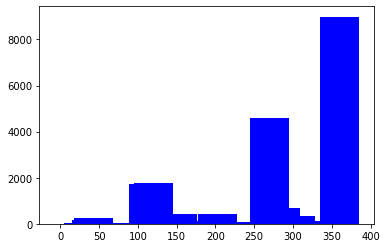

In [ ]:
import matplotlib.pyplot as plt
X = different_sizes.keys()
Y = list(different_sizes.values())
plt.bar(X, Y, 50, color='b' )
# repartition of the number of tokens per videos. Most videos have 3600 tokens. Each token is of size 768



In [ ]:
print(sorted(different_sizes.keys()))

[17.6, 19.2, 21.0, 22.5, 27.5, 28.0, 30.0, 32.4, 33.0, 35.2, 36.3, 39.6, 40.05, 43.2, 43.45, 44.8, 44.85, 47.25, 49.5, 50.0, 50.7, 52.0, 53.5, 55.46875, 57.15, 57.6, 58.8, 58.95, 66.0, 67.5, 69.0, 69.5, 76.8, 83.0, 83.6, 86.4, 88.0, 89.0, 90.0, 91.1625, 92.0, 93.6, 100.0, 100.8, 102.4, 103.125, 107.0, 108.0, 108.9, 109.5, 110.0, 110.25, 111.375, 112.0, 112.375, 112.5, 113.625, 113.75, 114.0, 114.75, 115.0, 115.6, 115.875, 116.525, 117.75, 119.25, 119.6, 120.0, 120.75, 120.75625, 121.09375, 121.5, 123.0, 123.75, 124.875, 126.0, 126.075, 127.125, 127.5, 128.0, 129.6, 131.0, 131.25, 132.0, 135.0, 136.66875, 137.25, 138.75, 139.3, 140.0, 140.8, 141.25, 141.95625, 142.875, 143.75, 144.0, 144.1, 145.2, 146.7625, 150.0, 150.15625, 150.43125, 150.75, 151.875, 153.0, 153.85, 154.125, 155.75625, 156.1875, 157.5, 158.25, 158.4, 158.41875, 158.7, 159.0, 159.5, 159.75, 160.0, 160.5, 162.0, 163.74375, 163.75, 164.0625, 164.53125, 166.25, 166.5, 168.75, 170.5, 171.28125, 172.8, 174.90625, 177.75, 180

In [ ]:
dir = "datasets/VATEX/32frames_old"
assert os.path.isfile(f"{dir}/{frame}")
im = Image.open(f"{dir}/{frame}")
im.show()

### ATTENTION MASK

In [1]:
import numpy as np
att_mask = np.load("attention_mask.npy")

In [2]:
att_mask = att_mask.reshape((794, 794))
print(np.around(att_mask[-10:,-10:], 1))
sig_att = 1/(1 + np.exp(-att_mask))

[[ 0.1 -1.6 -1.3 -1.4 -1.2 -1.7 -2.  -1.8 -1.6 -2. ]
 [-1.7  0.4 -1.7 -1.8 -1.9 -1.6 -1.5 -0.9 -1.6 -0.4]
 [-1.6 -1.4  0.2 -1.8 -1.8 -1.1 -1.4 -1.1 -0.9 -1.3]
 [-1.  -1.8 -0.9  0.4 -1.4 -1.1 -1.7 -1.6 -1.7 -1.4]
 [-1.7 -2.  -2.  -1.9  0.3 -1.6 -2.1 -1.6 -1.  -1.6]
 [-2.  -1.2 -0.7 -1.3 -1.  -0.  -0.9 -1.4 -1.4 -1.5]
 [-2.  -1.6 -1.8 -1.  -0.6 -1.1  0.5 -1.1 -1.3 -1.5]
 [-1.  -1.2 -1.4 -1.4 -1.8 -2.  -1.1  0.3 -1.7 -1.4]
 [-1.6 -1.  -1.2 -1.2  0.  -1.5 -1.  -1.8  0.1 -1.1]
 [-1.5 -1.5 -0.9 -1.6 -1.8 -1.5 -1.4 -1.4 -1.5  0. ]]


In [6]:
sig_att.dtype

dtype('float16')

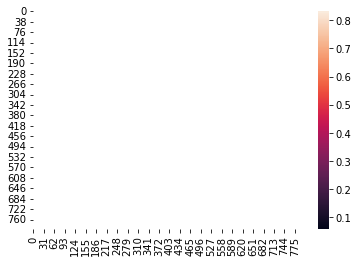

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(sig_att, linewidth=1)
plt.show()

In [23]:
x,y = k.nonzero()
plt.scatter(x,y,s=100,c=k[x,y]) #color as the values in k matrix

[[0.2 0.1 0.1 ... 0.1 0.2 0.1]
 [0.2 0.2 0.2 ... 0.3 0.2 0.4]
 [0.2 0.2 0.2 ... 0.2 0.3 0.2]
 ...
 [0.2 0.3 0.3 ... 0.6 0.1 0.2]
 [0.2 0.1 0.2 ... 0.1 0.5 0.3]
 [0.2 0.1 0.2 ... 0.2 0.2 0.5]]


## Generate proper files without videos I don't have

### Generate label and caption tsv

In [ ]:
tsv, dir, file = "train", "training", "caption"
import os.path as op

with open(f"datasets/VATEX/{tsv}.{file}.tsv", "r") as f:
    lines = f.readlines()
    to_keep = []
    for idx, line in enumerate(lines):
        id = [x.strip() for x in line.split('\t')][0].split('/')[-1].split('.')[0]
        if id == "M7wK6IucSEo":
            continue
        if id == "U7LC5P8VDZw":
            continue
        if op.exists(f"/mnt/video-galvatron-data/users/eloisez/youtube_dl/Audio_dl/{dir}/{id}.wav"):
            to_keep.append(idx) 

print(len(to_keep)) 

with open(f"datasets/VATEX/{tsv}.{file}.tsv", "w") as f:
    for idx, line in enumerate(lines):
        if idx in to_keep :
            f.write(line)

21901


### Get rid of false lineidx that will be regenerated next time

In [ ]:
!rm -f datasets/VATEX/*.lineidx

In [ ]:
tsvs = ["train", "val", "public_test"]
dirs = ["training", "validation", "test"]
for (tsv, dir) in zip(tsvs, dirs):
    print(tsv)
    print(dir)

train
training
val
validation
public_test
test


### Generate linelist files

First for caption

In [ ]:
def tsv_reader(tsv_file, sep='\t'):
    with open(tsv_file, 'r') as fp:
        for i, line in enumerate(fp):
            yield [x.strip() for x in line.split(sep)]

In [ ]:
import json
def generate_caption_linelist_file(split="train"):
    num_captions = []
    for row in tsv_reader(f"datasets/VATEX/{split}.caption.tsv"):
        num_captions.append(len(json.loads(row[1])))
    cap_linelist = ['\t'.join([str(img_idx), str(cap_idx)]) 
            for img_idx in range(len(num_captions)) 
            for cap_idx in range(num_captions[img_idx])
    ]
    save_file = f"datasets/VATEX/{split}.caption.linelist.tsv"
    with open(save_file, 'w') as f:
        f.write('\n'.join(cap_linelist))
    return save_file


In [ ]:
generate_caption_linelist_file("val")
generate_caption_linelist_file("train")
generate_caption_linelist_file("public_test")

'datasets/VATEX/public_test.caption.linelist.tsv'

For the other linelist use linelists.py

In [ ]:
"""
python linelists.py --split public_test
python linelists.py --split train
python linelists.py --split val

"""

### GENERATE RIGHT COCO CAPTIONS

In [ ]:
### CREATE CIDER READY JSON FILE 
import json
import os.path as op
split = "public_test"
with open(f"datasets/VATEX/{split}.caption_coco_format.json", "r") as f :
    data = json.load(f)
with open(f"models/table1/vatex/best-checkpoint/{split}.caption_coco_format.json", "w") as f :
    json.dump(data['annotations'], f, ensure_ascii=False, indent=4)

In [ ]:
import json
import os.path as op


split, dir = "train", "training"
data = tsv_reader(f"datasets/VATEX/{split}.caption.tsv")

good_videos, good_videos10 = [], []
for row in data :
    good_videos10 += 10 * [row[0]]
    good_videos.append(row[0])
print(len(good_videos), len(good_videos10))

counter = 0

with open(f"datasets/VATEX/_og.{split}.caption_coco_format.json", "r") as f :
    data = json.load(f)
good_annotations = []

print(len(data['annotations']))
for element in data['annotations']:
    youtube_id = element['image_id'].split('/')[-1].split('.')[0][:11]
    if not op.isfile(f"/mnt/video-galvatron-data/users/eloisez/youtube_dl/Video_dl/{dir}/{youtube_id}.mp4"):
        continue

    if not good_videos10[counter] == f'rawvideos/{dir}/{youtube_id}.mp4':
        #print(counter, good_videos[counter], f'rawvideos/{dir}/{youtube_id}.mp4')
        continue
    else :
        element['image_id'] = f'rawvideos/{dir}/{youtube_id}.mp4'
        element['id'] = counter
        counter +=1
        good_annotations.append(element)
data['annotations'] = good_annotations
print(len(data['annotations']))


counter = 0
deleted = 0
print(len(data['images']))
good_images = []
for element in data['images']:
    youtube_id = element['id'].split('/')[-1].split('.')[0][:11]
    if youtube_id == "M7wK6IucSEo":
        continue
    if not op.isfile(f"/mnt/video-galvatron-data/users/eloisez/youtube_dl/Video_dl/{dir}/{youtube_id}.mp4"):
        continue
    if not good_videos[counter] == f'rawvideos/{dir}/{youtube_id}.mp4':
        #print(counter, good_videos[counter], f'rawvideos/{dir}/{youtube_id}.mp4')
        deleted +=1
        continue
    else :
        element['id'] = f'rawvideos/{dir}/{youtube_id}.mp4'
        element['file_name'] = element['id']
        good_images.append(element)
        counter += 1
data['images'] = good_images
print(len(data['images']))
print(deleted)

with open(f"datasets/VATEX/{split}.caption_coco_format.json", "w") as f :
    json.dump(data, f, ensure_ascii=False, indent=4)


21901 219010
259910
219010
25991
21901
75


### AUDIO FEATURES

In [ ]:
import tensorflow as tf 
import json
import torch
from tqdm import tqdm
from os import listdir
from pathlib import Path
split = "test"
path = f"/mnt/video-galvatron-data/users/eloisez/VideoCaptioning/models/research/audioset/vggish/tfrecords/{split}"
dl_path = "datasets/VATEX/audio_features"
for record in tqdm(listdir(f"{path}")):
    id = Path(record).stem
    raw_dataset = tf.data.TFRecordDataset(f"{path}/{id}.tfrecord")
    for raw_record in raw_dataset.take(1):
        example = tf.train.SequenceExample()
        example.ParseFromString(raw_record.numpy())
        n = len(example.feature_lists.feature_list['audio_embedding'].feature)
        if n == 0 :
            print(id, n)
            break
        aud_feat = []
        for i in range(n):
            hexembed = example.feature_lists.feature_list['audio_embedding'].feature[i].bytes_list.value[0].hex()
            arrayembed = [int(hexembed[i:i+2],16) for i in range(0,len(hexembed),2)]
            assert len(arrayembed)==512
            aud_feat.append(torch.tensor(arrayembed, dtype=torch.float16))
        for i in range(10-n):
            aud_feat.append(torch.zeros(size=(512,), dtype=torch.float16))
        assert len(aud_feat) == 10
        aud_feat = torch.stack(aud_feat)
        file_path = f"{dl_path}/{id}.pt"
        torch.save(aud_feat, file_path)
            

 57%|█████▋    | 2886/5097 [00:42<00:32, 68.20it/s]

U7LC5P8VDZw 0


100%|██████████| 5097/5097 [01:15<00:00, 67.30it/s]


In [ ]:
torch.zeros(size=(512,), dtype=torch.float16).shape

torch.Size([512])

In [ ]:
import tensorflow as tf
import numpy as np
raw_dataset = tf.data.TFRecordDataset(f"{path}/{id}.tfrecord")
for raw_record in raw_dataset.take(1):
    example = tf.train.SequenceExample()
    example.ParseFromString(raw_record.numpy())
    aud_feat = []
    for i in range(10):
        hexembed = example.feature_lists.feature_list['audio_embedding'].feature[i].bytes_list.value[0].hex()
        arrayembed = [int(hexembed[i:i+2],16) for i in range(0,len(hexembed),2)]
        print(len(arrayembed)) #512


NotFoundError: /mnt/video-galvatron-data/users/eloisez/VideoCaptioning/models/research/audioset/vggish/tfrecords/test/VCdsrK2qNeA.tfrecord; No such file or directory [Op:IteratorGetNext]

In [ ]:
import tensorflow as tf 
import json
import torch
from tqdm import tqdm
from os import listdir
from pathlib import Path
fail = "1n7tJgJLvcU"
path = "/mnt/video-galvatron-data/users/eloisez/VideoCaptioning/models/research/audioset/vggish/tfrecords/training"
raw_dataset = tf.data.TFRecordDataset(f"{path}/{fail}.tfrecord")
for raw_record in raw_dataset.take(1):
    example = example = tf.train.SequenceExample()
    example.ParseFromString(raw_record.numpy())
    print(len(example.feature_lists.feature_list['audio_embedding'].feature))
    aud_feat = []
    for i in range(10):
        hexembed = example.feature_lists.feature_list['audio_embedding'].feature[i].bytes_list.value[0].hex()
        arrayembed = [int(hexembed[i:i+2],16) for i in range(0,len(hexembed),2)]
        print(len(arrayembed)) #512
        print(arrayembed)
        assert len(arrayembed)==512
        aud_feat.append(torch.tensor(arrayembed, dtype=torch.float16))

10
128
[0, 188, 112, 120, 200, 245, 255, 196, 28, 144, 201, 213, 97, 85, 52, 135, 255, 255, 0, 129, 184, 92, 82, 156, 255, 0, 147, 2, 124, 63, 78, 35, 108, 202, 102, 77, 255, 64, 146, 0, 185, 99, 0, 0, 5, 97, 48, 255, 0, 185, 0, 27, 232, 5, 255, 156, 67, 5, 222, 99, 0, 15, 227, 168, 0, 39, 34, 87, 79, 255, 228, 8, 0, 37, 255, 220, 255, 14, 255, 110, 255, 222, 148, 255, 65, 255, 225, 255, 0, 255, 0, 208, 145, 255, 255, 127, 255, 119, 0, 66, 61, 0, 143, 58, 0, 231, 0, 255, 152, 208, 255, 163, 146, 137, 0, 156, 198, 247, 0, 171, 250, 255, 255, 255, 255, 255, 255, 124]


AssertionError: 

In [ ]:
print(aud_feat[1].shape)

torch.Size([512])


In [64]:
MEAN = np.mean(dataset, 0)
STD = np.std(dataset, 0)
np.save("aud_mean", MEAN)
np.save("aud_std", STD)

In [77]:
#tsv = "train"
#tsv = "public_test"
tsv = "val"
file = "caption"
import os
import numpy as np
#mean = torch.zeros((10, 512))
#counter = 0
dataset_normalized = np.zeros((21884, 10, 512))
counter = 0
with open(f"datasets/VATEX/{tsv}.{file}.tsv", "r") as f:
    lines = f.readlines()
    for idx, line in enumerate(lines):
        id = [x.strip() for x in line.split('\t')][0].split('/')[-1].split('.')[0]
        if os.path.exists(f"datasets/VATEX/audio_features/{id}.pt"):
            tensornp = torch.load(f"datasets/VATEX/audio_features/{id}.pt")
            tensornp = (tensornp - MEAN)/STD
            torch.save(tensornp, f"datasets/VATEX/audio_features_norm/{id}.pt")
            #dataset_normalized[counter] = tensornp
            #assert np.count_nonzero(dataset_normalized[counter]) > 0
            #counter += 1

In [89]:
#tsv = "train"
#tsv = "public_test"
tsv = "val"
file = "caption"
import os
import numpy as np
#mean = torch.zeros((10, 512))
#counter = 0
#dataset_normalized = np.zeros((1364, 10, 512))
counter = 0
with open(f"datasets/VATEX/{tsv}.{file}.tsv", "r") as f:
    lines = f.readlines()
    for idx, line in enumerate(lines):
        id = [x.strip() for x in line.split('\t')][0].split('/')[-1].split('.')[0]
        if os.path.exists(f"datasets/VATEX/audio_features_norm/{id}.pt"):
            tensornp = torch.load(f"datasets/VATEX/audio_features_norm/{id}.pt")
            tensornp = torch.tensor(tensornp, dtype=torch.float16)
            torch.save(tensornp, f"datasets/VATEX/audio_features_norm/{id}.pt")
            #dataset_normalized[counter] = tensornp
            #assert np.count_nonzero(dataset_normalized[counter]) > 0
            #counter += 1

/home/eloisez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [20]:
tsv = "train"
#tsv = "public_test"
#tsv = "val"
file = "caption"
import os
#mean = torch.zeros((10, 512))
mean_check = torch.zeros((10, 512))
#counter = 0
with open(f"datasets/VATEX/{tsv}.{file}.tsv", "r") as f:
    lines = f.readlines()
    for idx, line in enumerate(lines):
        id = [x.strip() for x in line.split('\t')][0].split('/')[-1].split('.')[0]
        if id == "M7wK6IucSEo":
            continue
        if id == "U7LC5P8VDZw":
            continue
        if os.path.exists(f"datasets/VATEX/audio_features/{id}.pt"):
            #counter += 1
            tensor = torch.load(f"datasets/VATEX/audio_features/{id}.pt")
            #mean += tensor
            tensor = tensor - mean
            mean_check+= tensor

print(mean_check/counter)


tensor([[ 1.3052e-05, -3.9394e-05, -3.0419e-05,  ...,  3.1795e-05,
          1.9296e-05, -3.9025e-05],
        [-4.1085e-05, -4.5677e-05, -1.7567e-05,  ...,  4.6314e-05,
         -6.8850e-05, -2.3365e-05],
        [ 3.4070e-05, -3.5260e-06,  1.8687e-05,  ..., -1.3002e-05,
         -7.2585e-06,  3.4253e-05],
        ...,
        [-5.7242e-05,  4.8212e-06, -2.7701e-05,  ...,  1.8801e-05,
          8.1546e-05,  1.0214e-04],
        [ 3.7905e-05, -6.4167e-05, -2.3882e-04,  ..., -1.8513e-04,
         -8.7846e-05, -6.2040e-05],
        [ 6.2306e-05,  6.3245e-05, -3.3735e-05,  ..., -4.1828e-06,
         -8.1504e-05, -5.8475e-05]])


In [21]:
mean_check

tensor([[ 0.2856, -0.8621, -0.6657,  ...,  0.6958,  0.4223, -0.8540],
        [-0.8991, -0.9996, -0.3844,  ...,  1.0135, -1.5067, -0.5113],
        [ 0.7456, -0.0772,  0.4089,  ..., -0.2845, -0.1588,  0.7496],
        ...,
        [-1.2527,  0.1055, -0.6062,  ...,  0.4114,  1.7845,  2.2353],
        [ 0.8295, -1.4042, -5.2263,  ..., -4.0514, -1.9224, -1.3577],
        [ 1.3635,  1.3841, -0.7383,  ..., -0.0915, -1.7836, -1.2797]])

In [11]:
counter

1364

In [2]:
import torch
test = torch.load("datasets/VATEX/audio_features/1n7tJgJLvcU.pt")

/home/eloisez/.local/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print(test)

tensor([[203., 141., 131.,  ..., 252.,   2., 191.],
        [144., 203., 184.,  ...,  78., 161., 190.],
        [248.,  12.,   2.,  ...,  62., 190., 190.],
        ...,
        [226., 154.,  83.,  ..., 124., 203., 190.],
        [231., 217.,  47.,  ...,  29.,  27., 190.],
        [156.,  22., 137.,  ..., 197.,  61., 190.]], dtype=torch.float16)


In [3]:
c = torch.zeros(size=(6, 10, 512))
cc = torch.ones(size=(6, 786, 512))

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

In [23]:
sec_to_frame[1:len(sec_to_frame)]

[156, 235, 313, 392, 470, 548, 627, 705, 784]

In [25]:
sec_to_frame = [0, 78, 156, 235, 313, 392, 470, 548, 627, 705, 784]
for i in range(1, len(sec_to_frame)) :
    print(i)
    print(cc[0][sec_to_frame[i-1]:sec_to_frame[i]].shape)

1
torch.Size([78, 512])
2
torch.Size([78, 512])
3
torch.Size([79, 512])
4
torch.Size([78, 512])
5
torch.Size([79, 512])
6
torch.Size([78, 512])
7
torch.Size([78, 512])
8
torch.Size([79, 512])
9
torch.Size([78, 512])
10
torch.Size([79, 512])


In [17]:
sec_to_frame = [78, 78, 79, 78, 79, 78, 78, 79, 78, 79]
for i in range(1, len(sec_to_frame)) :
    sec_to_frame[i] = sec_to_frame[i-1] + sec_to_frame[i]

In [18]:
sec_to_frame

[78, 156, 235, 313, 392, 470, 548, 627, 705, 784]